# Data Intensive Computing Project
# Phase 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import models
from keras.layers import Conv2D
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

## Importing the dataset

In [2]:
Stroke = pd.read_csv('healthcare.csv')
Stroke

id  gender   age  hypertension  heart.disease ever.married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work.type Residence.type  avg_glucose.level   bmi   smoking.status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [3]:
Stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart.disease      5110 non-null   int64  
 5   ever.married       5110 non-null   object 
 6   work.type          5110 non-null   object 
 7   Residence.type     5110 non-null   object 
 8   avg_glucose.level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking.status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Dropping ID Column

In [4]:
Stroke = Stroke.drop(Stroke.columns[0], axis=1)
Stroke

gender   age  hypertension  heart.disease ever.married      work.type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence.type  avg_glucose.level   bmi   smoking.status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             202.21   NaN     never smoked       1  
2             Rural             105.92  32.5     never smoked       1  
3             Urban             171.23  34.4           smokes       1  
4             Rural             174.12  24.0     never smoked       1  
...             ...                ...   ...              ...     ...  
5105          Urban              83.75   NaN     never smoked       0  
5106          Urban             125.20  40.0     never smoked       0  
5107          Rural              82.99  30.6     never smoked       0  
5108          Rural             166.29  25.6  formerly smoked       0  
5109          Urban              85.28  26.2          Unknown       0  

[5110 rows x 11 columns]

## Renaming Columns

In [5]:
stroke = Stroke.rename(columns = {'heart.disease':'heart_disease', 'ever.married':'marital_status', 'work.type':'work_type', 'Residence.type':'residence_type', 'avg_glucose.level':'avgglucose_level', 'smoking.status':'smoking_status'})
stroke

gender   age  hypertension  heart_disease marital_status      work_type  \
0       Male  67.0             0              1            Yes        Private   
1     Female  61.0             0              0            Yes  Self-employed   
2       Male  80.0             0              1            Yes        Private   
3     Female  49.0             0              0            Yes        Private   
4     Female  79.0             1              0            Yes  Self-employed   
...      ...   ...           ...            ...            ...            ...   
5105  Female  80.0             1              0            Yes        Private   
5106  Female  81.0             0              0            Yes  Self-employed   
5107  Female  35.0             0              0            Yes  Self-employed   
5108    Male  51.0             0              0            Yes        Private   
5109  Female  44.0             0              0            Yes       Govt_job   

     residence_type  avgglucose_level   bmi   smoking_status  stroke  
0             Urban            228.69  36.6  formerly smoked       1  
1             Rural            202.21   NaN     never smoked       1  
2             Rural            105.92  32.5     never smoked       1  
3             Urban            171.23  34.4           smokes       1  
4             Rural            174.12  24.0     never smoked       1  
...             ...               ...   ...              ...     ...  
5105          Urban             83.75   NaN     never smoked       0  
5106          Urban            125.20  40.0     never smoked       0  
5107          Rural             82.99  30.6     never smoked       0  
5108          Rural            166.29  25.6  formerly smoked       0  
5109          Urban             85.28  26.2          Unknown       0  

[5110 rows x 11 columns]

## Number of NotNull and Null values

In [6]:
stroke.notna().sum()

gender              5110
age                 5110
hypertension        5110
heart_disease       5110
marital_status      5110
work_type           5110
residence_type      5110
avgglucose_level    5110
bmi                 4909
smoking_status      5110
stroke              5110
dtype: int64

In [7]:
stroke.isna().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
marital_status        0
work_type             0
residence_type        0
avgglucose_level      0
bmi                 201
smoking_status        0
stroke                0
dtype: int64

## Dropping of Null Values

In [8]:
stroke = stroke.dropna(axis=0)
stroke

gender   age  hypertension  heart_disease marital_status      work_type  \
0       Male  67.0             0              1            Yes        Private   
2       Male  80.0             0              1            Yes        Private   
3     Female  49.0             0              0            Yes        Private   
4     Female  79.0             1              0            Yes  Self-employed   
5       Male  81.0             0              0            Yes        Private   
...      ...   ...           ...            ...            ...            ...   
5104  Female  13.0             0              0             No       children   
5106  Female  81.0             0              0            Yes  Self-employed   
5107  Female  35.0             0              0            Yes  Self-employed   
5108    Male  51.0             0              0            Yes        Private   
5109  Female  44.0             0              0            Yes       Govt_job   

     residence_type  avgglucose_level   bmi   smoking_status  stroke  
0             Urban            228.69  36.6  formerly smoked       1  
2             Rural            105.92  32.5     never smoked       1  
3             Urban            171.23  34.4           smokes       1  
4             Rural            174.12  24.0     never smoked       1  
5             Urban            186.21  29.0  formerly smoked       1  
...             ...               ...   ...              ...     ...  
5104          Rural            103.08  18.6          Unknown       0  
5106          Urban            125.20  40.0     never smoked       0  
5107          Rural             82.99  30.6     never smoked       0  
5108          Rural            166.29  25.6  formerly smoked       0  
5109          Urban             85.28  26.2          Unknown       0  

[4909 rows x 11 columns]

## Count of Heart disease and Stroke for Hypertension

Text(0.5, 1.0, 'Hypertension with heartdisease and Stroke')

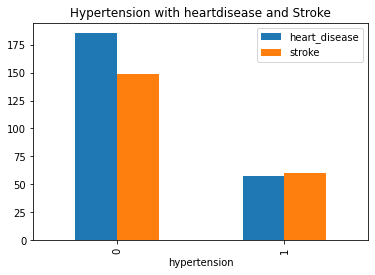

In [9]:
stroke[['hypertension', 'heart_disease', 'stroke']].groupby(by='hypertension').sum().plot.bar()
plt.title('Hypertension with heartdisease and Stroke')

## Boxplot of Smoking Status and their Glucose Level

Text(0.5, 1.0, 'Glucose Level of different Smoking Status')

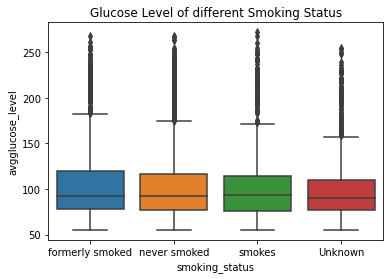

In [10]:
sb.boxplot(x='smoking_status', y='avgglucose_level', data=stroke)
plt.title('Glucose Level of different Smoking Status')

## Box Plot of WorkType by their BMI

Text(0.5, 1.0, 'Bmi based on their Work')

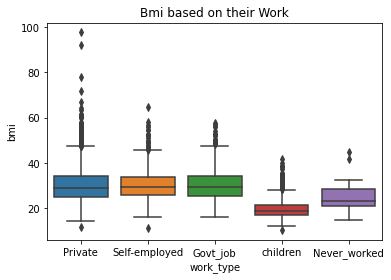

In [11]:
sb.boxplot(x='work_type', y='bmi', data=stroke)
plt.title('Bmi based on their Work')

## Box Plot of Smoking Status by their age for every Gender

Text(0.5, 1.0, 'The age of  different Smoking Status for Every Gender')

<Figure size 1440x1080 with 0 Axes>

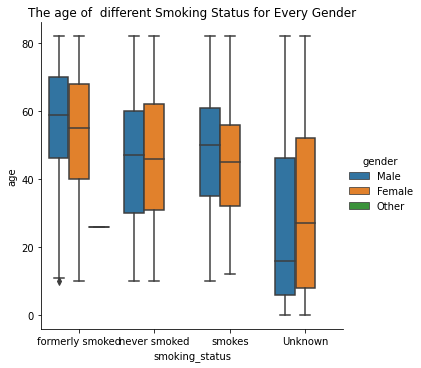

In [12]:
plt.figure(figsize=(20,15))
sb.catplot(x="smoking_status", y="age", hue="gender", kind="box", data=stroke);
plt.title('The age of  different Smoking Status for Every Gender')

## Grouping based on worktype 

In [13]:
gbd = stroke.groupby(['work_type'])
gbd.first()

gender   age  hypertension  heart_disease marital_status  \
work_type                                                                 
Govt_job       Female  61.0             0              1            Yes   
Never_worked     Male  14.0             0              0             No   
Private          Male  67.0             0              1            Yes   
Self-employed  Female  79.0             1              0            Yes   
children       Female  14.0             0              0             No   

              residence_type  avgglucose_level   bmi   smoking_status  stroke  
work_type                                                                      
Govt_job               Rural            120.46  36.8           smokes       1  
Never_worked           Rural            161.28  19.1          Unknown       0  
Private                Urban            228.69  36.6  formerly smoked       1  
Self-employed          Rural            174.12  24.0     never smoked       1  
children               Rural             57.93  30.9          Unknown       1

## Value Count of All ResidenceType

Text(0.5, 1.0, 'Different Residence Type and thier total')

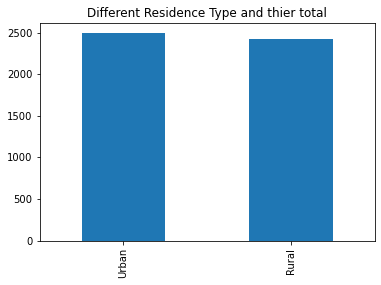

In [14]:
stroke['residence_type'].value_counts().plot(kind='bar')
plt.title('Different Residence Type and thier total')

## Grouping of Likeliness of Stroke based on their Smoking Status

In [15]:
gbd1 = stroke.groupby(['stroke', 'smoking_status'])
gbd1.first()

gender   age  hypertension  heart_disease  \
stroke smoking_status                                               
0      Unknown            Male   3.0             0              0   
       formerly smoked  Female  70.0             0              0   
       never smoked       Male  58.0             1              0   
       smokes           Female  32.0             0              0   
1      Unknown          Female  78.0             0              0   
       formerly smoked    Male  67.0             0              1   
       never smoked       Male  80.0             0              1   
       smokes           Female  49.0             0              0   

                       marital_status work_type residence_type  \
stroke smoking_status                                            
0      Unknown                     No  children          Rural   
       formerly smoked            Yes   Private          Rural   
       never smoked               Yes   Private          Urban   
       smokes                     Yes   Private          Rural   
1      Unknown                    Yes   Private          Urban   
       formerly smoked            Yes   Private          Urban   
       never smoked               Yes   Private          Rural   
       smokes                     Yes   Private          Urban   

                        avgglucose_level   bmi  
stroke smoking_status                           
0      Unknown                     95.12  18.0  
       formerly smoked             69.04  35.9  
       never smoked                87.96  39.2  
       smokes                      77.67  32.3  
1      Unknown                     58.57  24.2  
       formerly smoked            228.69  36.6  
       never smoked               105.92  32.5  
       smokes                     171.23  34.4

## Unique Values of Every Column

In [16]:
#s1 = pd.unique(stroke['id'])
s2 = pd.unique(stroke['gender'])
s3 = pd.unique(stroke['age'])
s4 = pd.unique(stroke['hypertension'])
s5 = pd.unique(stroke['heart_disease'])
s6 = pd.unique(stroke['marital_status'])
s7 = pd.unique(stroke['work_type'])
s8 = pd.unique(stroke['residence_type'])
s9 = pd.unique(stroke['avgglucose_level'])
s10 = pd.unique(stroke['bmi'])
s11 = pd.unique(stroke['smoking_status'])
s12 = pd.unique(stroke['stroke'])
s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12

(array(['Male', 'Female', 'Other'], dtype=object),
 array([6.70e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01, 7.40e+01,
        6.90e+01, 7.80e+01, 6.10e+01, 5.40e+01, 5.00e+01, 6.40e+01,
        7.50e+01, 6.00e+01, 7.10e+01, 5.20e+01, 8.20e+01, 6.50e+01,
        5.70e+01, 4.20e+01, 4.80e+01, 7.20e+01, 5.80e+01, 7.60e+01,
        3.90e+01, 7.70e+01, 6.30e+01, 7.30e+01, 5.60e+01, 4.50e+01,
        7.00e+01, 5.90e+01, 6.60e+01, 4.30e+01, 6.80e+01, 4.70e+01,
        5.30e+01, 3.80e+01, 5.50e+01, 4.60e+01, 3.20e+01, 5.10e+01,
        1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01, 3.50e+01,
        2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01, 1.70e+01,
        1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01, 2.90e+01,
        1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01, 3.60e+01,
        6.40e-01, 3.40e+01, 4.10e+01, 8.80e-01, 5.00e+00, 2.60e+01,
        3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00, 9.00e+00,
        1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01, 1.08e+0

## Count of Duplicates for a Particular column

In [17]:
dup1 = stroke.pivot_table(columns=['gender'], aggfunc='size')
dup1

gender
Female    2897
Male      2011
Other        1
dtype: int64

In [18]:
stroke.pivot_table(columns=['smoking_status'], aggfunc='size')

smoking_status
Unknown            1483
formerly smoked     837
never smoked       1852
smokes              737
dtype: int64

## Cleaning of Column in Dataframe

In [19]:
stroke.drop(stroke[stroke['gender'] == 'Other'].index, inplace = True)
stroke['gender'].unique()

array(['Male', 'Female'], dtype=object)

## Heatmap of Correlation of Data

Text(0.5, 1.0, 'Heatmap of Correlation of Dataset')

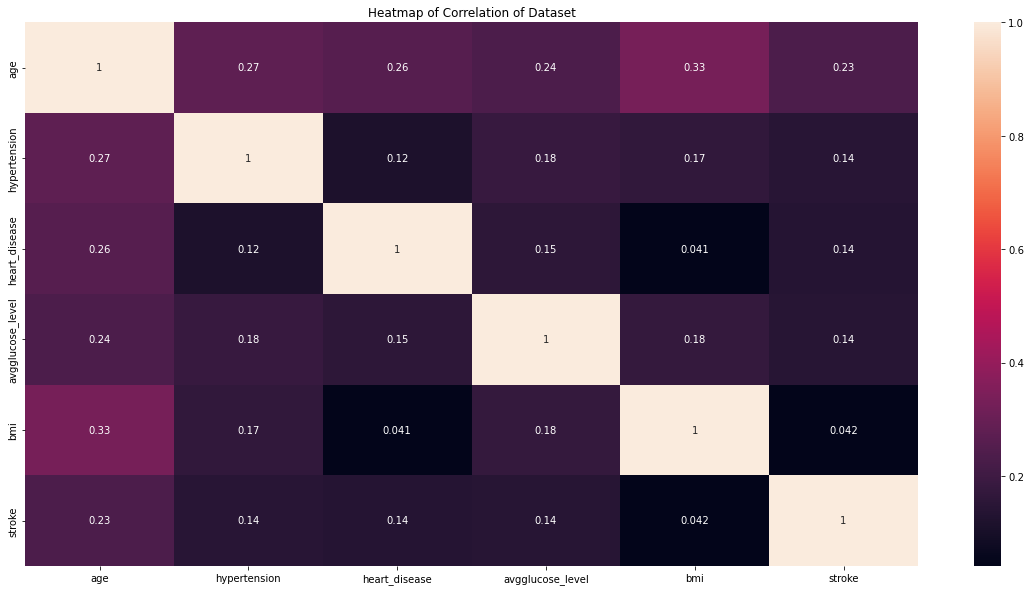

In [20]:
plt.figure(figsize=(20,10))
sb.heatmap(stroke.corr(), annot=True)
plt.title('Heatmap of Correlation of Dataset')

## Correlation of Data

In [21]:
stroke.corr()

age  hypertension  heart_disease  avgglucose_level  \
age               1.000000      0.274395       0.257104          0.236000   
hypertension      0.274395      1.000000       0.115978          0.180614   
heart_disease     0.257104      0.115978       1.000000          0.154577   
avgglucose_level  0.236000      0.180614       0.154577          1.000000   
bmi               0.333314      0.167770       0.041322          0.175672   
stroke            0.232313      0.142503       0.137929          0.138984   

                       bmi    stroke  
age               0.333314  0.232313  
hypertension      0.167770  0.142503  
heart_disease     0.041322  0.137929  
avgglucose_level  0.175672  0.138984  
bmi               1.000000  0.042341  
stroke            0.042341  1.000000

## Count of Smoking Status and Their Work Type

Text(0.5, 1.0, 'Bar Plot of Count of Different Work Type vs Smoking Status')

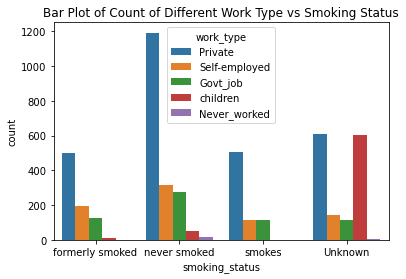

In [22]:
sb.countplot(x='smoking_status', data=stroke, hue='work_type')
plt.title('Bar Plot of Count of Different Work Type vs Smoking Status')

## Stroke based on Gender

Text(0.5, 1.0, 'Stroke History based on Gender')

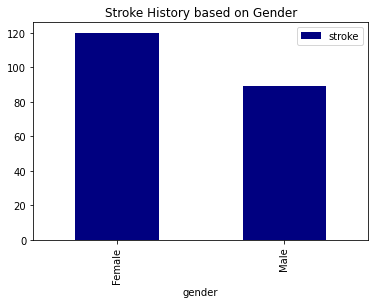

In [23]:
stroke[['gender', 'stroke']].groupby(by='gender').sum().plot.bar(color='#000080')
plt.title('Stroke History based on Gender')

## Label Encoding of Dataset

In [24]:
stroke['gender'] = LabelEncoder().fit_transform(stroke[['gender']])
stroke['marital_status'] = LabelEncoder().fit_transform(stroke[['marital_status']])
stroke['work_type'] = LabelEncoder().fit_transform(stroke[['work_type']])
stroke['residence_type'] = LabelEncoder().fit_transform(stroke[['residence_type']])
stroke['smoking_status'] = LabelEncoder().fit_transform(stroke[['smoking_status']])
stroke

gender   age  hypertension  heart_disease  marital_status  work_type  \
0          1  67.0             0              1               1          2   
2          1  80.0             0              1               1          2   
3          0  49.0             0              0               1          2   
4          0  79.0             1              0               1          3   
5          1  81.0             0              0               1          2   
...      ...   ...           ...            ...             ...        ...   
5104       0  13.0             0              0               0          4   
5106       0  81.0             0              0               1          3   
5107       0  35.0             0              0               1          3   
5108       1  51.0             0              0               1          2   
5109       0  44.0             0              0               1          0   

      residence_type  avgglucose_level   bmi  smoking_status  stroke  
0                  1            228.69  36.6               1       1  
2                  0            105.92  32.5               2       1  
3                  1            171.23  34.4               3       1  
4                  0            174.12  24.0               2       1  
5                  1            186.21  29.0               1       1  
...              ...               ...   ...             ...     ...  
5104               0            103.08  18.6               0       0  
5106               1            125.20  40.0               2       0  
5107               0             82.99  30.6               2       0  
5108               0            166.29  25.6               1       0  
5109               1             85.28  26.2               0       0  

[4908 rows x 11 columns]

## Knowing the Datatypes

In [25]:
stroke.dtypes

gender                int32
age                 float64
hypertension          int64
heart_disease         int64
marital_status        int32
work_type             int32
residence_type        int32
avgglucose_level    float64
bmi                 float64
smoking_status        int32
stroke                int64
dtype: object

## Change of datatype

In [26]:
stroke['gender'] = stroke['gender'].astype(np.int64)
stroke['age'] = stroke['age'].astype(np.int64)
stroke['marital_status'] = stroke['marital_status'].astype(np.int64)
stroke['work_type'] = stroke['work_type'].astype(np.int64)
stroke['residence_type'] = stroke['residence_type'].astype(np.int64)
stroke['smoking_status'] = stroke['smoking_status'].astype(np.int64)
stroke

gender  age  hypertension  heart_disease  marital_status  work_type  \
0          1   67             0              1               1          2   
2          1   80             0              1               1          2   
3          0   49             0              0               1          2   
4          0   79             1              0               1          3   
5          1   81             0              0               1          2   
...      ...  ...           ...            ...             ...        ...   
5104       0   13             0              0               0          4   
5106       0   81             0              0               1          3   
5107       0   35             0              0               1          3   
5108       1   51             0              0               1          2   
5109       0   44             0              0               1          0   

      residence_type  avgglucose_level   bmi  smoking_status  stroke  
0                  1            228.69  36.6               1       1  
2                  0            105.92  32.5               2       1  
3                  1            171.23  34.4               3       1  
4                  0            174.12  24.0               2       1  
5                  1            186.21  29.0               1       1  
...              ...               ...   ...             ...     ...  
5104               0            103.08  18.6               0       0  
5106               1            125.20  40.0               2       0  
5107               0             82.99  30.6               2       0  
5108               0            166.29  25.6               1       0  
5109               1             85.28  26.2               0       0  

[4908 rows x 11 columns]

In [27]:
#su1 = pd.unique(stroke['id'])
su2 = pd.unique(stroke['gender'])
su3 = pd.unique(stroke['age'])
su4 = pd.unique(stroke['hypertension'])
su5 = pd.unique(stroke['heart_disease'])
su6 = pd.unique(stroke['marital_status'])
su7 = pd.unique(stroke['work_type'])
su8 = pd.unique(stroke['residence_type'])
su9 = pd.unique(stroke['avgglucose_level'])
su10 = pd.unique(stroke['bmi'])
su11 = pd.unique(stroke['smoking_status'])
su12 = pd.unique(stroke['stroke'])
su2, su3, su4, su5, su6, su7, su8, su9, su10, su11, su12

(array([1, 0], dtype=int64),
 array([67, 80, 49, 79, 81, 74, 69, 78, 61, 54, 50, 64, 75, 60, 71, 52, 82,
        65, 57, 42, 48, 72, 58, 76, 39, 77, 63, 73, 56, 45, 70, 59, 66, 43,
        68, 47, 53, 38, 55, 46, 32, 51, 14,  3,  8, 37, 40, 35, 20, 44, 25,
        27, 23, 17, 13,  4, 16, 22, 30, 29, 11, 21, 18, 33, 24, 36,  0, 34,
        41,  5, 26, 31,  7, 12, 62,  2,  9, 15, 28, 10,  1, 19,  6],
       dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([1, 0], dtype=int64),
 array([2, 3, 0, 4, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([228.69, 105.92, 171.23, ...,  82.99, 166.29,  85.28]),
 array([36.6, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8, 27.3,
        28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5, 28.3,
        44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9, 28.5,
        26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8, 40.4,
        25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27

## Pie Plot of Gender

gender
0    2897
1    2011
dtype: int64

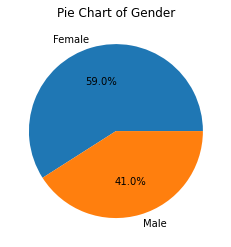

In [28]:
dup2 = stroke.pivot_table(columns=['gender'], aggfunc='size')
plt.pie(dup2, labels=['Female','Male'], autopct='%1.1f%%')
plt.title('Pie Chart of Gender')
dup2

## Heart Disease vs Stroke

Text(0.5, 1.0, 'Stroke History based on Heart Condition')

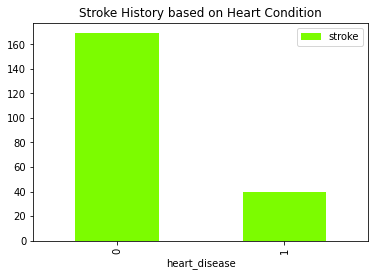

In [29]:
stroke[['heart_disease', 'stroke']].groupby(by='heart_disease').sum().plot.bar(color='#7CFC00')
plt.title('Stroke History based on Heart Condition')

## Number of Unique values in the dataset

In [30]:
stroke.nunique(axis=0)

gender                 2
age                   83
hypertension           2
heart_disease          2
marital_status         2
work_type              5
residence_type         2
avgglucose_level    3851
bmi                  418
smoking_status         4
stroke                 2
dtype: int64

## Statistics of Dataset

In [31]:
stroke.describe()

gender          age  hypertension  heart_disease  marital_status  \
count  4908.000000  4908.000000   4908.000000    4908.000000     4908.000000   
mean      0.409739    42.857579      0.091891       0.049511        0.652812   
std       0.491836    22.577004      0.288901       0.216954        0.476125   
min       0.000000     0.000000      0.000000       0.000000        0.000000   
25%       0.000000    25.000000      0.000000       0.000000        0.000000   
50%       0.000000    44.000000      0.000000       0.000000        1.000000   
75%       1.000000    60.000000      0.000000       0.000000        1.000000   
max       1.000000    82.000000      1.000000       1.000000        1.000000   

         work_type  residence_type  avgglucose_level         bmi  \
count  4908.000000     4908.000000       4908.000000  4908.00000   
mean      2.170130        0.507335        105.297402    28.89456   
std       1.092701        0.499997         44.425550     7.85432   
min       0.000000        0.000000         55.120000    10.30000   
25%       2.000000        0.000000         77.067500    23.50000   
50%       2.000000        1.000000         91.680000    28.10000   
75%       3.000000        1.000000        113.495000    33.10000   
max       4.000000        1.000000        271.740000    97.60000   

       smoking_status       stroke  
count     4908.000000  4908.000000  
mean         1.375509     0.042584  
std          1.067417     0.201937  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          2.000000     0.000000  
75%          2.000000     0.000000  
max          3.000000     1.000000

# Phase 2

## Splitting of Dataset into Train and Test Data

In [32]:
X = stroke.iloc[:,:10]
y = stroke.loc[:,'stroke']
X,y

(      gender  age  hypertension  heart_disease  marital_status  work_type  \
 0          1   67             0              1               1          2   
 2          1   80             0              1               1          2   
 3          0   49             0              0               1          2   
 4          0   79             1              0               1          3   
 5          1   81             0              0               1          2   
 ...      ...  ...           ...            ...             ...        ...   
 5104       0   13             0              0               0          4   
 5106       0   81             0              0               1          3   
 5107       0   35             0              0               1          3   
 5108       1   51             0              0               1          2   
 5109       0   44             0              0               1          0   
 
       residence_type  avgglucose_level   bmi  smoking_status 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3435, 10), (1473, 10), (3435,), (1473,))

## 1.Neural Network

In [34]:
classifier = Sequential()

In [35]:
classifier.add(Dense(64, activation = 'relu', input_dim = 10))

In [36]:
classifier.add(Dense(1, activation = 'sigmoid'))

In [37]:
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [38]:
pred = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
344/344 [==============================] - 1s 1ms/step - loss: 0.4323 - accuracy: 0.9269 - val_loss: 0.2108 - val_accuracy: 0.9538
Epoch 2/100
344/344 [==============================] - 0s 1ms/step - loss: 0.1849 - accuracy: 0.9540 - val_loss: 0.1762 - val_accuracy: 0.9498
Epoch 3/100
344/344 [==============================] - 0s 974us/step - loss: 0.1837 - accuracy: 0.9555 - val_loss: 0.1929 - val_accuracy: 0.9538
Epoch 4/100
344/344 [==============================] - 0s 983us/step - loss: 0.1812 - accuracy: 0.9540 - val_loss: 0.2124 - val_accuracy: 0.9538
Epoch 5/100
344/344 [==============================] - 0s 991us/step - loss: 0.1872 - accuracy: 0.9540 - val_loss: 0.1711 - val_accuracy: 0.9518
Epoch 6/100
344/344 [==============================] - 0s 965us/step - loss: 0.1690 - accuracy: 0.9572 - val_loss: 0.1667 - val_accuracy: 0.9511
Epoch 7/100
344/344 [==============================] - 0s 965us/step - loss: 0.1830 - accuracy: 0.9552 - val_loss: 0.1959 - val_accura

In [39]:
pred.history

{'loss': [0.4322572648525238,
  0.18486979603767395,
  0.18368907272815704,
  0.18122638761997223,
  0.18715302646160126,
  0.1689535230398178,
  0.18300840258598328,
  0.16944901645183563,
  0.17298461496829987,
  0.1764008104801178,
  0.17099283635616302,
  0.16647736728191376,
  0.16878032684326172,
  0.16909904778003693,
  0.17154167592525482,
  0.17189206182956696,
  0.17140628397464752,
  0.1654069423675537,
  0.16269494593143463,
  0.1640661656856537,
  0.16135773062705994,
  0.16661439836025238,
  0.16033042967319489,
  0.15656733512878418,
  0.1559373140335083,
  0.16287900507450104,
  0.1655326634645462,
  0.16300459206104279,
  0.15987159311771393,
  0.16154474020004272,
  0.15838390588760376,
  0.16853837668895721,
  0.15612392127513885,
  0.15649914741516113,
  0.1590701788663864,
  0.15868724882602692,
  0.1589391529560089,
  0.15653617680072784,
  0.1527533382177353,
  0.1569354087114334,
  0.14758870005607605,
  0.15030576288700104,
  0.16574476659297943,
  0.1492454409

In [40]:
pred.history['loss'][-1]

0.14250458776950836

In [41]:
pred.history['accuracy'][-1]

0.9580786228179932

### Accuracy and Loss of Test Data

In [42]:
classifier.evaluate(X_test,y_test)

47/47 [==============================] - 0s 609us/step - loss: 0.1589 - accuracy: 0.9518


[0.1589173525571823, 0.9517990350723267]

### Accuracy of Train vs Test Data

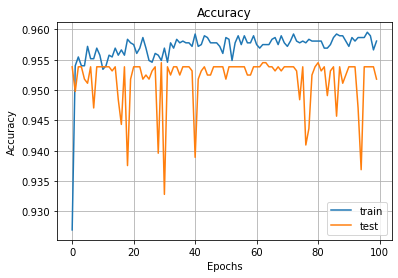

In [43]:
plt.title('Accuracy')
plt.plot(pred.history['accuracy'], label='train')
plt.plot(pred.history['val_accuracy'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


### Loss of Train vs Test Data 

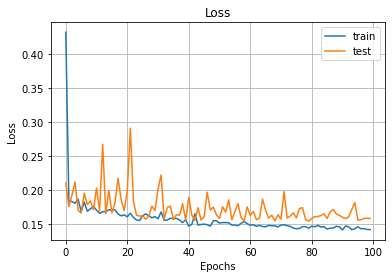

In [44]:
plt.title('Loss')
plt.plot(pred.history['loss'], label='train')
plt.plot(pred.history['val_loss'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

## 2.Ridge Regression

In [45]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge = ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print(y_pred_ridge)

[ 0.06319876 -0.01311304 -0.00393355 ...  0.04022839  0.05995872
  0.03642397]


### Plotting Actual vs Predicted Value 

No handles with labels found to put in legend.


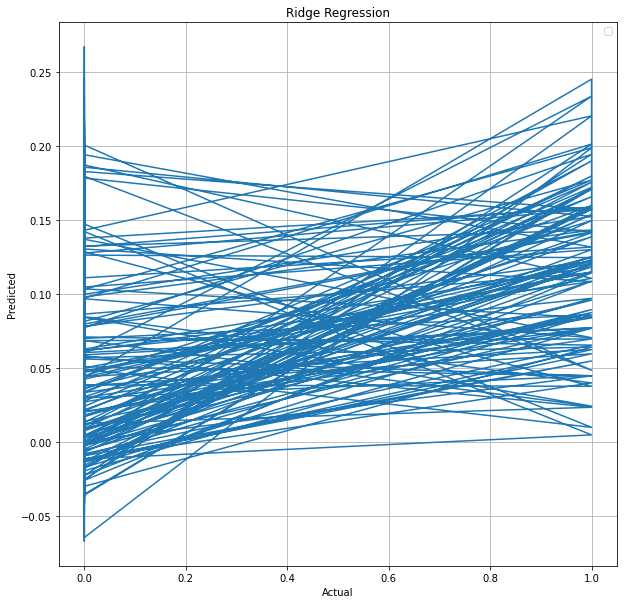

In [46]:
plt.figure(figsize = (10,10))
plt.title('Ridge Regression')
plt.plot(y_test, y_pred_ridge)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.grid()
plt.show()

### Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, R2

In [47]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_ridge

0.04040731917633468

In [48]:
rmse_ridge = math.sqrt(mse_ridge)
rmse_ridge

0.2010157187294931

In [49]:
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mae_ridge

0.0870371559818066

In [50]:
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_ridge

0.08234318370159632

## 3.KNN

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

[0 0 0 ... 0 0 0]


### Accuracy of KNN 

In [52]:
print(accuracy_score(y_test, y_pred_knn))

0.9504412763068567


### Plotting Actual vs Predicted Value

No handles with labels found to put in legend.


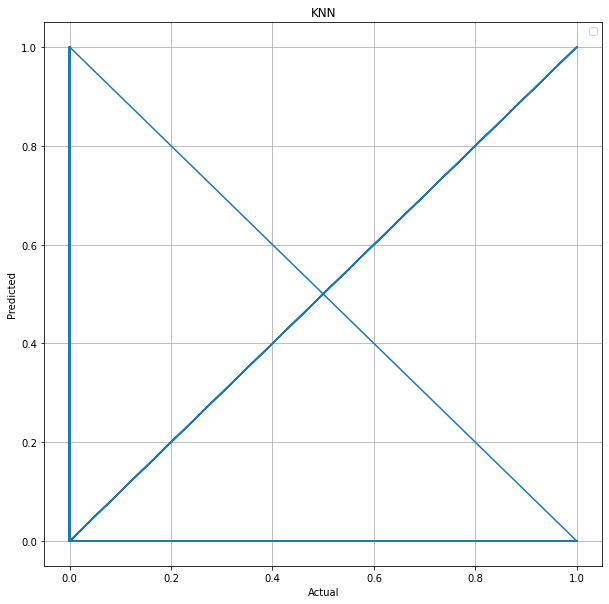

In [53]:
plt.figure(figsize = (10,10))
plt.title('KNN')
plt.plot(y_test, y_pred_knn)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.grid()
plt.show()

### Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, R2 

In [54]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_knn

0.04955872369314324

In [55]:
rmse_knn = math.sqrt(mse_knn)
rmse_knn

0.22261788718147346

In [56]:
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mae_knn

0.04955872369314324

In [57]:
r2_knn = r2_score(y_test, y_pred_knn)
r2_knn

-0.1254867071383714


## 4.Decision Tree 

In [58]:
decision = tree.DecisionTreeClassifier()
decision = decision.fit(X_train, y_train)
y_pred_decision = decision.predict(X_test)
print(y_pred_decision)

[0 0 0 ... 0 0 0]


In [59]:
plt.figure(figsize = (250, 250))
tree.plot_tree(decision)

[Text(6320.648656286465, 13232.368421052632, 'X[1] <= 67.5\ngini = 0.079\nsamples = 3435\nvalue = [3294, 141]'),
 Text(2374.129867998833, 12517.105263157895, 'X[1] <= 44.5\ngini = 0.038\nsamples = 2888\nvalue = [2832, 56]'),
 Text(634.8308051341891, 11801.842105263158, 'X[1] <= 37.5\ngini = 0.007\nsamples = 1754\nvalue = [1748, 6]'),
 Text(260.4434072345391, 11086.57894736842, 'X[7] <= 57.94\ngini = 0.003\nsamples = 1408\nvalue = [1406, 2]'),
 Text(130.22170361726955, 10371.315789473683, 'X[7] <= 57.925\ngini = 0.053\nsamples = 37\nvalue = [36, 1]'),
 Text(65.11085180863478, 9656.052631578947, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]'),
 Text(195.33255542590433, 9656.052631578947, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(390.66511085180866, 10371.315789473683, 'X[9] <= 2.5\ngini = 0.001\nsamples = 1371\nvalue = [1370, 1]'),
 Text(325.5542590431739, 9656.052631578947, 'gini = 0.0\nsamples = 1197\nvalue = [1197, 0]'),
 Text(455.77596266044344, 9656.052631578947, 'X[7] <= 76.23

### Accuracy of Decision Tree

In [60]:
acc = accuracy_score(y_test, y_pred_decision)
acc

0.9205702647657841

### Plotting Actual vs Predicted Value 

No handles with labels found to put in legend.


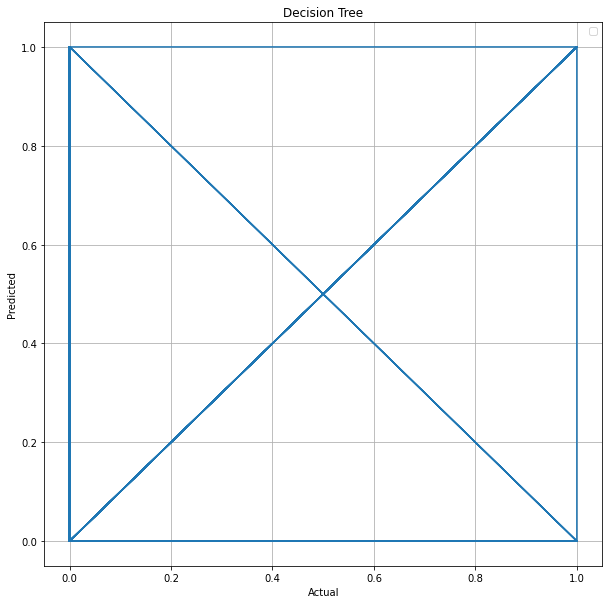

In [61]:
plt.figure(figsize = (10,10))
plt.title('Decision Tree')
plt.plot(y_test, y_pred_decision)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.grid()
plt.show()

### Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, R2 

In [62]:
mse_decision = mean_squared_error(y_test, y_pred_decision)
mse_decision

0.07942973523421588

In [63]:
rmse_decision = math.sqrt(mse_decision)
rmse_decision

0.2818328143318586

In [64]:
mae_decision = mean_absolute_error(y_test, y_pred_decision)
mae_decision

0.07942973523421588

In [65]:
r2_decision = r2_score(y_test, y_pred_decision)
r2_decision

-0.8038622566464309

## 5.K-Means Clustering

In [66]:
km = KMeans(n_clusters=5)
y_pred_kmeans = km.fit_predict(X_test)
print(y_pred_kmeans)

[2 4 0 ... 4 3 3]


### Accuracy of K-Means

In [67]:
acc = accuracy_score(y_test, y_pred_kmeans)
acc

0.14596062457569586

### Plotting Actual vs Predicted Value 

No handles with labels found to put in legend.


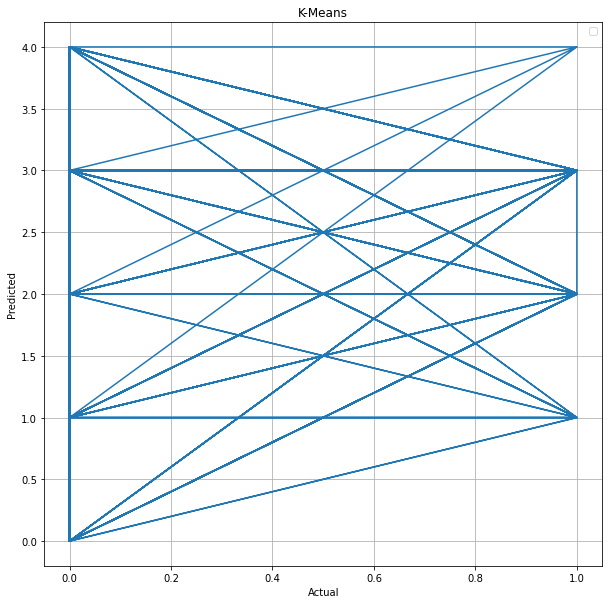

In [68]:
plt.figure(figsize = (10,10))
plt.title('K-Means')
plt.plot(y_test, y_pred_kmeans)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.grid()
plt.show()

### Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, R2 

In [69]:
mse_kmeans = mean_squared_error(y_test, y_pred_kmeans)
mse_kmeans

7.599456890699253

In [70]:
rmse_kmeans = math.sqrt(mse_kmeans)
rmse_kmeans

2.756711245433452

In [71]:
mae_kmeans = mean_absolute_error(y_test, y_pred_kmeans)
mae_kmeans

2.3774609640190087

In [72]:
r2_kmeans = r2_score(y_test, y_pred_kmeans)
r2_kmeans

-171.5849068453004

## 6.Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
random = RandomForestClassifier(max_depth=2, random_state=0)
random.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [74]:
y_pred_random = random.predict(X_test)
print(y_pred_random)

[0 0 0 ... 0 0 0]


### Accuracy of Random Forest

In [75]:
acc = accuracy_score(y_test, y_pred_random)
acc

0.9538357094365241

### Plotting Actual vs Predicted Value

No handles with labels found to put in legend.


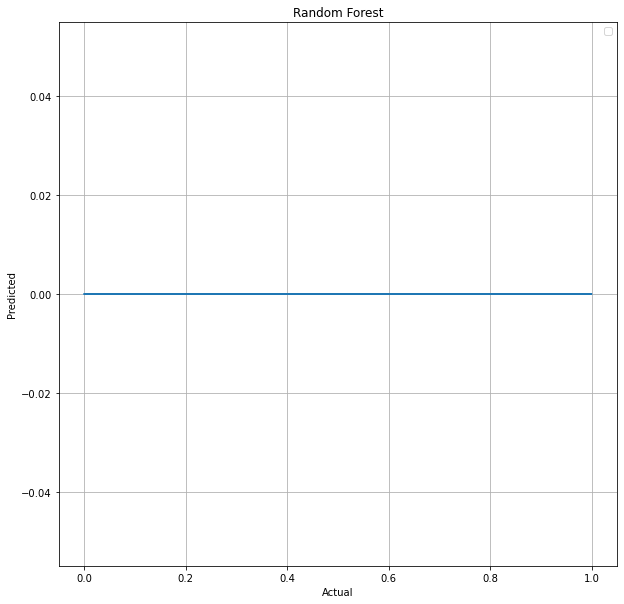

In [76]:
plt.figure(figsize = (10,10))
plt.title('Random Forest')
plt.plot(y_test, y_pred_random)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.grid()
plt.show()

### Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, R2 

In [77]:
mse_random = mean_squared_error(y_test, y_pred_random)
mse_random

0.0461642905634759

In [78]:
rmse_random = math.sqrt(mse_random)
rmse_random

0.214858768877316

In [79]:
mae_random = mean_absolute_error(y_test, y_pred_random)
mae_random

0.0461642905634759

In [80]:
r2_random = r2_score(y_test, y_pred_random)
r2_random

-0.04839857651245549

# Phase 3

## Prediction

In [81]:
import pickle

In [82]:
X_test

gender  age  hypertension  heart_disease  marital_status  work_type  \
3956       1   36             0              0               0          2   
2388       0   10             0              0               0          4   
2946       0    9             0              0               0          4   
1013       0   77             1              0               1          3   
5020       1    5             0              0               0          4   
...      ...  ...           ...            ...             ...        ...   
2144       0   43             0              0               1          2   
1359       1    4             0              0               0          4   
658        0   36             0              0               0          3   
3408       0   63             0              0               1          2   
1552       1   51             0              0               1          3   

      residence_type  avgglucose_level   bmi  smoking_status  
3956               1            200.68  25.8               0  
2388               1             61.34  19.1               0  
2946               0             90.22  18.7               0  
1013               1            102.01  29.5               0  
5020               1             97.46  17.6               0  
...              ...               ...   ...             ...  
2144               1             96.30  28.1               3  
1359               1            132.41  16.3               0  
658                0             77.12  28.4               2  
3408               0             85.81  35.6               2  
1552               1             69.18  35.7               3  

[1473 rows x 10 columns]

In [83]:
ridge_model = ridge

In [84]:
stroke_prediction = ridge_model.predict(X_test)
stroke_prediction

array([ 0.06319876, -0.01311304, -0.00393355, ...,  0.04022839,
        0.05995872,  0.03642397])

In [90]:
import pickle
file_name = 'req_model.sav'
pickle.dump(ridge_model,open(file_name,'wb'))


In [91]:
load_model = pickle.load(open(file_name,'rb'))

In [95]:
load_model.predict([[1,51,0,0,1,3,1,69.18,35.7,3]])[0]

0.03642396570742389